In [85]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load ="data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
rideData = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset

pyberData = pd.merge(cityData, rideData, how = 'left', on=['city', 'city'])

# Display the data table for preview
pyberData = pyberData[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]
pyberData.head()


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

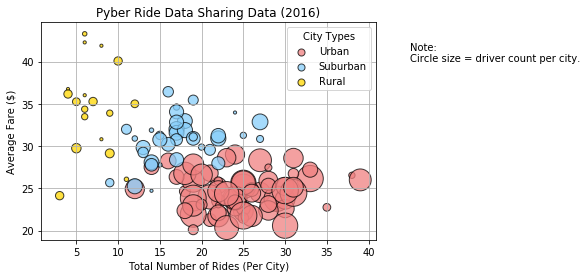

In [86]:
## Obtain the x and y coordinates for each of the three city types
    #Data frame per city & group by city
urbanType = pyberData[pyberData["type"] == "Urban"].groupby([pyberData["city"]])
ruralType = pyberData[pyberData["type"] == "Rural"].groupby([pyberData["city"]])
suburbanType = pyberData[pyberData["type"] == "Suburban"].groupby([pyberData["city"]])

    #Caculations per city type & define each axis, x=ride count, y fare average, z driver count average

xUrban = urbanType["ride_id"].count()
yUrban = urbanType["fare"].mean()
zUrban = urbanType["driver_count"].mean()

xRural = ruralType["ride_id"].count()
yRural = ruralType["fare"].mean()
zRural = ruralType["driver_count"].mean()

xSuburban = suburbanType["ride_id"].count()
ySuburban = suburbanType["fare"].mean()
zSuburban = suburbanType["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(xUrban, yUrban, label = "Urban", s=zUrban * 10, color=["lightcoral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(xSuburban, ySuburban, label = "Suburban", s=zSuburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(xRural, yRural, label = "Rural", s=zRural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Data Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 10, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(45,40,"Note: \nCircle size = driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")


In [87]:
# Show plot
plt.show()

## Total Fares by City Type

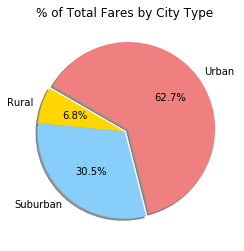

In [88]:
# Calculate Type Percents
types = pyberData.groupby(['type'])
fares = types['fare'].sum()
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.05)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/PyberTotalFaresbyCity.png", bbox_inches="tight")

In [89]:
# Show Figure
plt.show()

## Total Rides by City Type

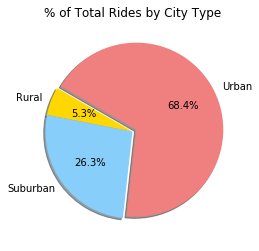

In [90]:
# Calculate Ride Percents
rides = types['ride_id'].count()
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.05)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Images/PyberTotalRidesPerCity.png", bbox_inches="tight")

In [91]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers by City Type')

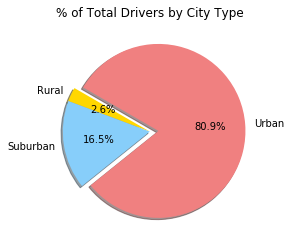

In [92]:
# Calculate Driver Percents
typesGrouped = cityData.groupby(['type'])
driverTotal = typesGrouped['driver_count'].sum()
# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(driverTotal, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure


In [93]:
# Show Figure
plt.show()

Observation that can be gather from this data

With the information provided above we can conclude the following:
    
    1-The scatter plot demonstrates how urban cities contain the lowest fare yet they contain the more rides than 
    rural and suburban areas.
    
    2-The fare by city pie demosnstrates how regardless of urban cities having the lowest fares, urban cities 
    make over 60% of the companies fares.
    
    3-Another observation is that since the percentage of rides and fares by city is very similar we can
    conclude that an expasion of Pyber in cities other than Urban will be beneficial for the company.